### 代码风格

1. 类以驼峰命名：class FooClass
2. 函数名以\_分割：def func_separated_by_underscores(*a):
3. 变量名小写：var = "lowercase"
4. 内部变量以\_开头：_var = "_single_leading_underscore"
5. 类私有变量以\_\_开头：__var = " __double_leading_underscore"
6. 不需要的变量为\_

### 经验

+ range函数生成的是0到给定数字-1的序列，因此遍历数组只需要传入len即可，若有比较i和i+1，只需传入len-1即可
+ 列表切片是不会返回:后面数字对应索引值的！因此返回整个列表应该是[0:len]，虽然len值超出索引

#### 操作符
is 和 is not 在判断时比较的是两个变量引用对象的内存地址，而 == 和 != 则比较的是引用对象的值。<br>
***判断一个值是不是None时，最好使用is和is not***

In [6]:
a = [1,2]
b = [1,2]
a is b,a==b

(False, True)

#### 位运算
右移运算符（>>）

定义：将一个数的各二进制位全部右移若干位，正数左补0，负数左补1，右边丢弃。

例如：a=a>>2 将a的二进制位右移2位，左补0 或者 左补1得看被移数是正还是负。

***操作数每右移一位，相当于该数除以2。左移同理，等于乘2。计算后的数向下取整。***

In [3]:
7>>2

1

In [6]:
12<<1

24

In [1]:
3<<2

12

#### The Zen Of Python

In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


对于Complex is better than complicated的理解：
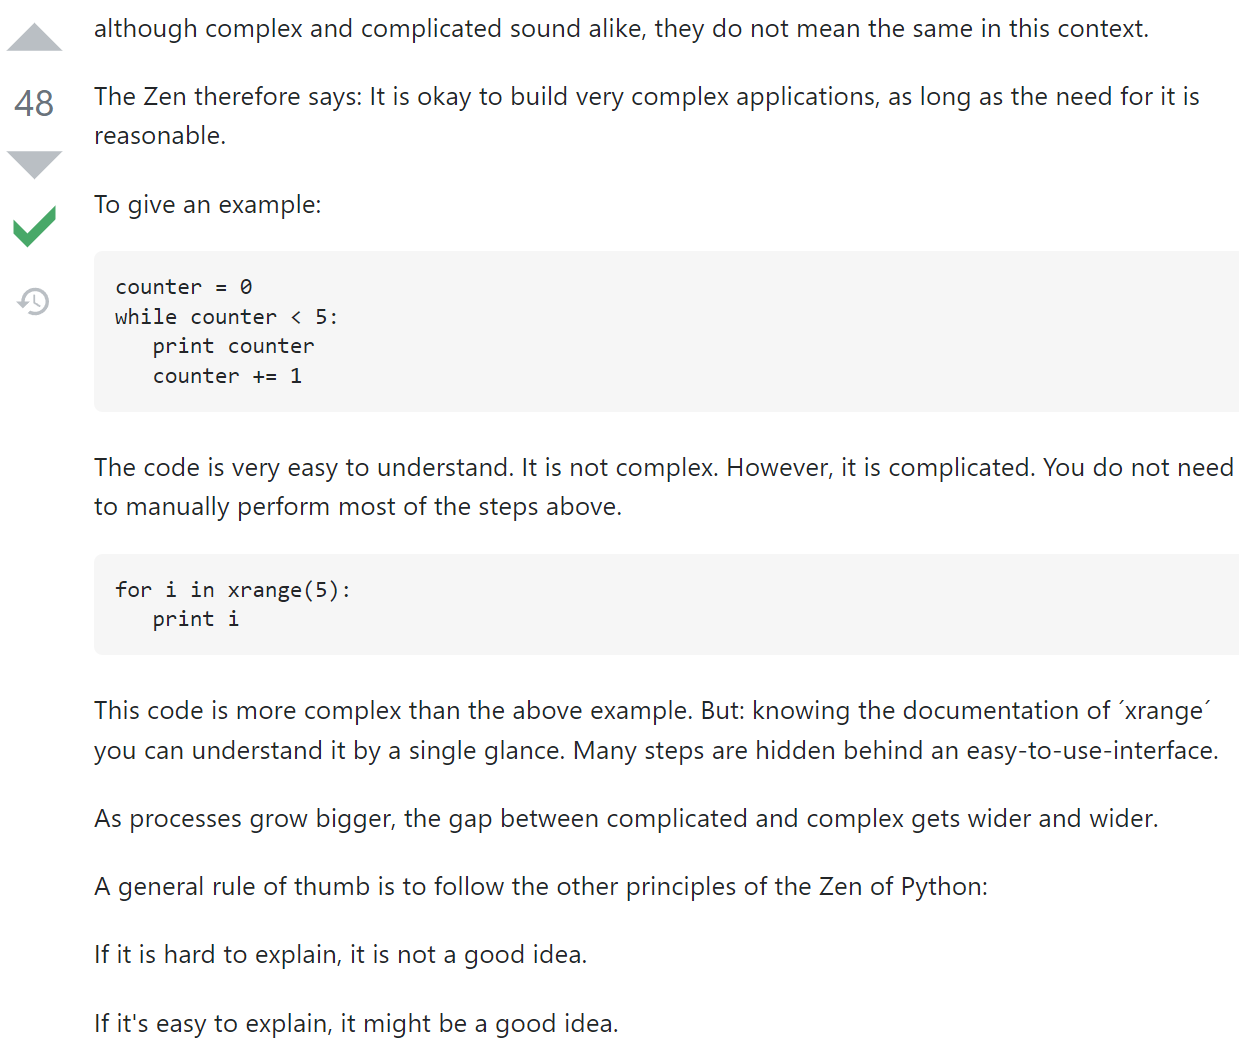

### 列表生成式

In [1]:
# 生成整数的平方数组
a= [n*n for n in range(1,11)]
print(a)

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


In [7]:
# 字符串整理，可以使用函数
d = {'x': 'A', 'y': 'B', 'z': 'C' }
[k + '=' + v for k, v in d.items()]

['x=A', 'y=B', 'z=C']

In [10]:
# 有判断功能

#此处不能使用else
a = [x for x in range(1, 11) if x % 2 == 0] 
#此处可以使用else
b = [x if x % 2 == 0 else -x for x in range(1, 11)]

print(a,b)

[2, 4, 6, 8, 10] [-1, 2, -3, 4, -5, 6, -7, 8, -9, 10]


### 生成器
函数传参的时候使用生成器可以减小内存占用

In [19]:
def sample():
    yield 'Is'
    yield 'Chicago'
    yield 'Not'
    yield 'Chicago?'
''.join(sample())

'IsChicagoNotChicago?'

In [3]:
# 列表生成式和生成器的区别仅在于最外层的[]和()
# 生成器不会直接计算出所有结果，只有通过g.next()
# 或者for循环获得下一个返回值
g = (x * x for x in range(3))
for n in g:
    print(n)

0
1
4


In [6]:
# 函数生成器,yield会返回值
def odd():
    print('step 1')
    yield (1)
    print('step 2')
    yield(3)
    print('step 3')
    yield(5)
o = odd()
for i in o:
    print(i)

step 1
1
step 2
3
step 3
5


### 函数

#### 文档功能
1. 在函数名下以"""开头结尾的注释作为文档
2. 可通过__doc__或者help(func)来获取注释

In [5]:
def example():
    """a test da"""
    pass
example.__doc__

'a test da'

In [6]:
help(example)

Help on function example in module __main__:

example()
    a test da



#### 只能通过关键字调用：使用*分隔
1. *号之后均只能通过关键字调用

In [7]:
def f(a, b, *, kw):
    print(a, b, kw)
f(1, 2, kw=3)

1 2 3


In [8]:
f(1, 2, 3)

TypeError: f() takes 2 positional arguments but 3 were given

#### 类型注解
1. 参数通过:指定，返回值通过->指定
2. \_\_annotations\_\_可返回注解信息

In [9]:
def fib(n: int) -> int:
    a, b = 0, 1
    for _ in range(n):
        b, a = a + b, b
    return a

fib(10)

55

In [10]:
fib.__annotations__

{'n': int, 'return': int}

In [21]:
from typing import Generator
def fib(n: int) -> Generator:
    a, b = 0, 1
    for _ in range(n):
        b, a = a + b, b
        yield a

a = fib(10)
list(a)

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

#### 函数结果缓存：lru_cache
+ 将函数输入和输出做为键值对保存

In [73]:
from functools import lru_cache
import time
@lru_cache(maxsize=None)
def fib(n):
    if n < 2:
        return n
    return fib(n - 1) + fib(n - 2)

s = time.time()
_ = fib(521)
e = time.time(); e - s

0.0

#### 函数的上下文管理器

In [ ]:
from contextlib import contextmanager

@contextmanager
def opening(filename, mode='r'):
   f = open(filename, mode)
   try:
      yield f
   finally:
      f.close()

with opening('example.txt') as fd:
   fd.read()

### 高阶函数

#### MAP / REDUCE

In [ ]:
#MAP：传入一个函数，一个列表，返回一个经过函数处理的Iterator

#将数字转换为字符串
a = list(map(str, [1, 2, 3, 4, 5, 6, 7, 8, 9]))

REDUCE：传入一个函数,一个列表和初始值

若无初始值则将第一个作为结果，第二个作为参数传入函数

In [1]:
# 不同在于REDUCE把结果继续和序列的下一个元素做累积计算

#把序列[1, 3, 5, 7, 9]变换成整数13579
from functools import reduce
def fn(x, y):
    return x * 10 + y
reduce(fn, [1, 3, 5, 7, 9])

13579

In [5]:
def fn(x, y):
    return x * 10 + y
reduce(fn, [1, 3, 5, 7, 9],1)

113579

#### 匿名函数LAMBDA

In [8]:
list(map(lambda x: x * x, [1, 2, 3, 4, 5, 6, 7, 8, 9]))

[1, 4, 9, 16, 25, 36, 49, 64, 81]

### 时间

#### time模块
+ time.time()  获取当前时间戳
+ time.sleep()  推迟调用线程的运行

In [11]:
import time
start = time.time()
a=1
for i in range(1000000):
    a*=i
end = time.time()
print(end-start)

0.07477164268493652


#### timeit 模块
测试一行代码的运行时间，默认测试100万次，可指定number

In [15]:
import timeit 
t2 = timeit.Timer('x=range(1000)') 
t2.timeit(number=10000)

0.0016464000000269152

#### 魔术指令timeit

+ %timeit可以用于得到***一行代码***的运行时间，%%time可以用于得到***一个cell中***的代码运行时间。
+ %timeit -n  -r  -t|-c -q -p -o
+ -n：在一次循环中执行N次给定的代码
+ -r: 代码重复r个循环
+ -t：使用time.time作为基础来计算时间，是Unix的默认方式
+ -c：使用time.clock作为基础来计算时间，是windows的默认方式，返回cpu时间
+ -p ：结果保留P个有效数字
+ -o：加上-o后可以将结果赋值给一个变量，就可以直接调用%timeit的结果了。

In [ ]:
%%timeit -n 10 -r 5 -o
import numpy as np
print(np.random.randint(10))

### 进程和线程

+ 对于操作系统来说，一个任务就是一个进程（Process），进程内的这些“子任务”称为线程（Thread）

In [20]:
# 一个CPU密集型任务
def count1(n):
    while n>0:
        n-=1
# 一个I/O密集型任务，CPU处理时间很快多数时间在等待I/O阻塞
def count2():
    time.sleep(0.01)

#### 多进程

In [23]:
from threading import Thread
def test_thread():
    t1=Thread(target=count1,args=(100000,))  # 逗号不能少
    t2=Thread(target=count1,args=(100000,))
    t1.start()
    t2.start()
    t1.join()
    t2.join()

In [24]:
%%timeit
test_thread()

16.6 ms ± 196 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [26]:
%%timeit
count1(100000)

7.78 ms ± 119 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
#### 多线程

In [27]:
%%timeit
from multiprocessing import Process
def test_process():
    t1=Process(target=count1,args=(100000,))
    t2=Process(target=count1,args=(100000,))
    t1.start()
    t2.start()
    t1.join()
    t2.join()

664 ns ± 12.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


### 面向对象编程

#### 基础使用

In [1]:
class Student(object):

    def __init__(self, name, score):   # 初始化函数，第一个参数必须是self
        self.__name = name             # 在类对象属性前加两个下横杠使此属性变为私有变量，不能再外部直接访问，只能通过对象方法获取
        self.__score = score

    def print_score(self):
        print('%s: %s' % (self.__name, self.__score))

In [2]:
a = Student("11","12")

In [3]:
a.print_score()

11: 12


#### 继承与多态

```
class Animal(object):
    def run(self):
        print('Animal is running...')
class Dog(Animal):  # 子类自动拥有父类的方法
    pass
```

##### 获取继承关系 class.mro()

In [5]:
class A(object):
    def say(self):
        print('A')
class B(object):
    def say(self):
        print('b')
class C(A,B):
    pass
c = C()
c.say()

A


In [7]:
C.mro()

[__main__.C, __main__.A, __main__.B, object]

#### 方法

##### 类方法和静态方法
+ 静态方法类和实例均能调用，类方法只能类调用，实例方法只能实例调用

In [103]:
class example(object):
    @classmethod
    def clsmethod(cls):
        print("I am classmethod")
    @staticmethod
    def stmethod():
        print("I am staticmethod")
    def instmethod(self):
        print("I am instancemethod")
ex = example()
ex.classmethod()

AttributeError: 'example' object has no attribute 'classmethod'

In [100]:
example.stmethod()

I am staticmethod


In [101]:
example.instmethod()

TypeError: instmethod() missing 1 required positional argument: 'self'

In [102]:
ex.stmethod(),example.stmethod()

I am staticmethod
I am staticmethod


(None, None)

##### 抽象方法
+ 定义一个不需要实现的方法，类似于接口

In [104]:
from abc import ABCMeta, abstractmethod
class base(object):
  __metaclass__ = ABCMeta
  @abstractmethod
  def absmethod(self):
    """ Abstract method """

class example(base):
  def absmethod(self):
    print("abstract")

ex = example()
ex.absmethod()

abstract


#### 获取对象信息

##### isinstance判断类型
isinstance() 与 type() 区别：

type() 不会认为子类是一种父类类型，不考虑继承关系。

isinstance() 会认为子类是一种父类类型，考虑继承关系。

In [42]:
class Person():
    pass
class Student(Person):
    pass

p = Person()
s = Student()
isinstance(s,Person), type(s)

(True, __main__.Student)

##### dir()：获取一个对象所有属性和方法
+ 若不指定对象，则返回当前定义域里所有的变量名

In [4]:
dir("abc")

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',


##### 获取实例的类名 name.__class__.__name__

In [81]:
class ExampleClass(object):
    pass

ex = ExampleClass()
ex.__class__.__name__

'ExampleClass'

##### 判断继承关系issubclass

In [83]:
class Example(object):
    def __init__(self):
        self.name = "ex"
    def printex(self):
        print("This is an Example")

issubclass(Example, object)

True

### 高级面向对象

定义了一个class，创建了一个class的实例后，可以给该实例绑定任何属性和方法，也可以直接对该类绑定
```
>>> def set_age(self, age): # 定义一个函数作为实例方法
...     self.age = age
...
>>> from types import MethodType
>>> s.set_age = MethodType(set_age, s) # 给实例绑定一个方法
>>> s.set_age(25) # 调用实例方法
>>> s.age # 测试结果
25
```

#### \_\_init\_\_()：初始化对象中默认参数进行重载的坑
+ python函数可以通过设置默认参数，从而实现可变参数值，叫做重载
+ init函数中的默认值若传入的是一个mutable对象，那么不指定该参数时，所有实例的此参数都会指向同一个内存id，修改其中一个，其他的也会变化
+ mutable对象的引用是指针传递，而immutable对象的引用是值传递
+ 解决此问题的方法是将默认值设置为None，在init中通过判断来赋予默认值

In [2]:
class Student(object):
    def __init__(self,names=[]):
        self.names = names
s1=Student()
s2=Student()
s1.names.append(1)
s2.names.append(2)
s1.names

[1, 2]

In [5]:
class Student(object):
    def __init__(self,names=None):
        if names is None:
            self.names = []
        else:
            self.names = names
s1=Student()
s2=Student()
s1.names.append(1)
s2.names.append(2)
s1.names,s2.names

([1], [2])

#### \_\_slots\_\_()：只允许实例添加某些属性
+ 可以节省内存

In [10]:
class Student(object):
    __slots__ = ('name', 'set_age') # 用tuple定义允许绑定的属性名称

In [6]:
s = Student()

In [7]:
s.age = 1

属性无法绑定

In [8]:
s.year = 2

AttributeError: 'Student' object has no attribute 'year'

方法无法绑定

In [9]:
def set_age(self, age): 
    self.age = age
from types import MethodType
s.set_age = MethodType(set_age, s) # 给实例绑定一个方法

AttributeError: 'Student' object has no attribute 'set_age'

修改元组后可绑定

In [12]:
def set_age(self, age): 
    self.age = age
s = Student()
from types import MethodType
s.set_age = MethodType(set_age, s) # 给实例绑定一个方法

#### @property：使用装饰器将一个方法当做一个属性来使用
+ 也可以将@property作为计算属性使用

In [84]:
class Student(object):

    @property
    def score(self):    # 相当于getter方法
        return self._score

    @score.setter        # 相当于setter方法
    def score(self, value):
        if not isinstance(value, int):
            raise ValueError('score must be an integer!')
        if value < 0 or value > 100:
            raise ValueError('score must between 0 ~ 100!')
        self._score = value
    @score.deleter
    def score(self):
        del self._score

In [89]:
s = Student()
s.score = 1
s.score

1

In [86]:
s.score = 2
s.score

2

In [90]:
del s.score
s.score

AttributeError: 'Student' object has no attribute '_score'

计算属性

In [92]:
class Student(object):

    @property
    def score(self):    # 相当于getter方法
        return self._score*2
    @score.setter        # 相当于setter方法
    def score(self, value):
        self._score = value
s = Student()
s.score = 2
s.score

4

#### \_\_iter\_\_：理解迭代器和可迭代对象的概念

+ \_\_iter\_\_()方法，该方法返回一个迭代对象，然后，Python的for循环就会不断调用该迭代对象的\_\_next\_\_()方法拿到循环的下一个值，直到遇到StopIteration错误时退出循环。
+ 可迭代对象可以没有next方法，看作是一个数据容器，可以不知道数据next数到哪里去了
+ 可迭代对象的iter必须返回一个迭代器
+ 可迭代对象要么有getitem，要么有iter
+ 迭代器必须有next方法
+ 官方规定迭代器本身也必须是可迭代对象，即iter返回自己，否则可能出错

In [3]:
class Fib(object):    # 斐波那契数列
    def __init__(self):
        self.a, self.b = 0, 1 # 初始化两个计数器a，b

    def __iter__(self):
        return self # 实例本身就是迭代对象，故返回自己

    def __next__(self):
        self.a, self.b = self.b, self.a + self.b # 计算下一个值
        if self.a > 100: # 退出循环的条件
            raise StopIteration()
        return self.a # 返回下一个值

In [4]:
for n in Fib():
    print(n)

1
1
2
3
5
8
13
21
34
55
89


#### \_\_contains\_\_
实现了contains的类可以使用in关键字

In [43]:
class Stack:

    def __init__(self):
        self.__list = []

    def push(self, val):
        self.__list.append(val)

    def pop(self):
        return self.__list.pop()

    def __contains__(self, item):
        return True if item in self.__list else False

stack = Stack()
stack.push(1)
print(1 in stack)
print(0 in stack)

True
False


#### \_\_getitem\_\_

In [5]:
# 像list那样按照下标取出元素
class Fib(object):
    def __getitem__(self, n):
        a, b = 1, 1
        for x in range(n):
            a, b = b, a + b
        return a

In [6]:
f = Fib()
f[0]

1

#### \_\_getattr\_\_

当调用不存在的属性时，比如score，Python解释器会试图调用\_\_getattr\_\_(self, 'score')来动态返回一个属性

In [7]:
class Student(object):

    def __init__(self):
        self.name = 'Michael'

    def __getattr__(self, attr):
        if attr=='score':
            return 99

#### \_\_call\_\_：在实例中调用自己的属性和方法
+ 可通过callable来判断能否调用

In [11]:
class Student(object):
    def __init__(self, name):
        self.name = name

    def __call__(self):
        print('My name is %s.' % self.name)

In [12]:
s = Student('Michael')
s()

My name is Michael.


In [14]:
callable(s),callable('12')

(True, False)

#### \_\_repr\_\_： 方法是类的实例化对象用来做“自我介绍”的方法

默认情况下，它会返回当前对象的“类名+object at+内存地址”，而如果对该方法进行重写，可以为其制作自定义的自我描述信息。

In [50]:
class CLanguage:
    def __init__(self):
        self.name = "C语言中文网"
        self.add = "http://c.biancheng.net"
    def __repr__(self):
        return "CLanguage[name="+ self.name +",add=" + self.add +"]"
    def __str__(self):
        return "21CLanguage[name="+ self.name +",add=" + self.add +"]"
clangs = CLanguage()
print(clangs,)

21CLanguage[name=C语言中文网,add=http://c.biancheng.net]


####  \_\_str\_\_： 同上一个作用，但不需要加（）

#### 富比较方法
+ object.lt(self, other)
+ object.le(self, other)
+ object.eq(self, other)
+ object.ne(self, other)
+ object.gt(self, other)
+ object.ge(self, other)
> x<y 调用 x.__lt__(y)、x<=y 调用 x.__le__(y)、x==y 调用 x.__eq__(y)、x!=y 调用 x.__ne__(y)、x>y 调用 x.__gt__(y)、x>=y 调用 x.__ge__(y)
+ 实现了上述\_\_lt\_\_方法的的类实例可以直接使用sorted

In [53]:
class Stu:
    def __init__(self,val):
        self.val = val
    def __lt__(self,other):
        return self.val < other.val
s1,s2,s3 = Stu(3),Stu(4),Stu(1)
for i in sorted([s1,s2,s3]):
    print(i.val)

1
3
4


In [54]:
s1<s3

False

#### 枚举类

In [14]:
from enum import Enum

Month = Enum('Month', ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))

In [15]:
Month.Apr

<Month.Apr: 4>

In [16]:
for name, member in Month.__members__.items():
    print(name, '=>', member, ',', member.value)

Jan => Month.Jan , 1
Feb => Month.Feb , 2
Mar => Month.Mar , 3
Apr => Month.Apr , 4
May => Month.May , 5
Jun => Month.Jun , 6
Jul => Month.Jul , 7
Aug => Month.Aug , 8
Sep => Month.Sep , 9
Oct => Month.Oct , 10
Nov => Month.Nov , 11
Dec => Month.Dec , 12


#### 装饰器
+ 加上装饰器后，调用函数相当于调用装饰器函数返回的wrapper函数

In [8]:
import time

def timeit(f):
    def wrapper(*args,**kwargs):   #此处是传入的参数
        start = time.time()
        ret = f(*args,**kwargs)
        print(f'共计{time.time()-start}s')
        return ret
    return wrapper

In [13]:
@timeit
def count(n):
    ret = 1
    for i in range(1,n):
        ret*=i
    return 
count(100000)

共计3.23993182182312s


##### 作为装饰器的类
下面的例子的add(a,b)等价于
```
t = Timer1()
add2 = t(add)
add2(a,b)
```

In [27]:
import time
from datetime import datetime
class Timer1:
    def __init__(self,curtime=False):
        self.curtime = curtime
    def __call__(self,func):    # 调用实例方法
        def wrapper(*args,**kwargs):   # 返回包装函数
            if self.curtime:
                return datetime.now()
            start = time.time()
            ret = func(*args,**kwargs)
            print(f'共计{time.time()-start}s')
            return ret
        return wrapper
@Timer1(False)
def add(a,b):
    return a**b

In [26]:
add(9780,190)

共计0.0s


146009935678515608836623623653006338089514492205738947686200317367504800076206500761216723772421058412842984685681563058067824770567637981111222732776957323460192102541073169841842501023701818309022952627438278688079503679607229931344597096770095387297990823692220798373273491334948256888326298669840245885960182742553827638808395989367144363704881158546828344553535446226688901516063170351509798338963730080045893622559914579108693645082351450714320182614989932368395320995560563631367909173005426012341560983290054008921194361815505893056298945231514489507492910858240000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

##### 一个类的装饰器
例：为每一个有此装饰器的类添加\_\_str\_\_方法

In [33]:
def appendstr(cls):
    def __str__(self):
        return f'名字为{self.name}'
    cls.__str__ = __str__
    return cls

@appendstr
class Student:
    def __init__(self,name):
        self.name = name

In [34]:
s = Student('paul')
print(s)

名字为paul


##### 使用@wraps装饰器解决函数的文档变成wrapper函数的问题

In [21]:
from functools import wraps
def decorator(func):
    """this is decorator __doc__"""
    @wraps(func)
    def wrapper(*args, **kwargs):
        """this is wrapper __doc__"""
        print("this is wrapper method")
        return func(*args, **kwargs)
    return wrapper

@decorator
def test():
    """this is test __doc__"""
    print("this is test method")

print("__name__: ", test.__name__)
print("__doc__:  ", test.__doc__)


__name__:  test
__doc__:   this is test __doc__


#### 生成器
+ 调用生成器函数会返回一个生成器对象（在函数体内有yield就会被识别为生成器函数）
+ 只有对生成器对象调用next时，才会真正执行函数体内代码
+ 当yield后，函数会暂停在yield的下面一行，下次调用next时接在下面执行
+ 生成器和迭代器的区别就在于不需要保存当前进度的状态，只需要接着去运行即可
+ 可以通过send方法在yield一个值后赋予yield值

In [1]:
def gener(num):
    while num>0:
        yield num
        num-=1
for i in gener(3):
    print(i)

3
2
1


In [3]:
g = gener(3)
# g.next()
next(g)

3

In [7]:
def gener(num):
    while num>0:
        tmp = yield num
        num-=1
        if tmp == True:
            return
g= gener(10)
for i in g:
    if i<5:
        g.send(True)
    print(i)

10
9
8
7
6
5


StopIteration: 

### 错误处理

#### try except finally

当我们认为某些代码可能会出错时，就可以用try来运行这段代码，如果执行出错，则后续代码不会继续执行，而是直接跳转至错误处理代码，即except语句块，执行完except后，如果有finally语句块，则执行finally语句块，至此，执行完毕。

In [1]:
try:
    print('try...')
    r = 10 / 0
    print('result:', r)
except ZeroDivisionError as e:
    print('except:', e)
finally:
    print('finally...')
print('END')

try...
except: division by zero
finally...
END


#### assert断言

assert的意思是，表达式n != 0应该是True，否则，根据程序运行的逻辑，后面的代码肯定会出错。

如果断言失败，assert语句本身就会抛出AssertionError：

In [2]:
def foo(s):
    n = int(s)
    assert n != 0, 'n is zero!'
    return 10 / n

def main():
    foo('0')

### 文件与系统模块

#### 文件和目录
1. os.name——判断现在正在实用的平台，Windows 返回 ‘nt'; Linux 返回’posix'

2. os.getcwd()——得到当前工作的目录。

3. os.listdir()——指定所有目录下所有的文件和目录名。例：
4. os.remove()——删除指定文件

5. os.rmdir()——删除指定目录

6. os.mkdir()——创建目录
6. 这样只能建立一层，要想递归建立可用：os.makedirs()
7. os.system()——执行shell命令。
13. os.chdir()——改变目录到指定目录
16. os.path.join(path, name)——连接目录和文件名。
8. os.path.isfile()——判断指定对象是否为文件。是返回True,否则False

8. os.path.isdir()——判断指定对象是否为目录。是True,否则False。

In [1]:
import os

In [2]:
os.name

'nt'

In [4]:
os.getcwd()

'C:\\Users\\60234\\python'

In [5]:
os.listdir()

['.ipynb_checkpoints',
 'baostock.ipynb',
 'candlestick.html',
 'HMM.ipynb',
 'ml_ch2.ipynb',
 'pds.ipynb',
 'pyecharts.ipynb',
 'Python.ipynb',
 'Python.zip',
 'Python基础.ipynb',
 'R基础.ipynb',
 'R统计.ipynb',
 'STOCK.ipynb',
 'stock_swarm.ipynb',
 'test.ipynb',
 'Untitled.ipynb',
 'Untitled1.ipynb',
 '存档',
 '数据分析',
 '数据分析1.ipynb',
 '深度学习',
 '股票数据.ipynb',
 '词汇分析.ipynb',
 '进度条.ipynb',
 '驾驶意图']

In [8]:
os.system('echo 12')

0

In [9]:
os.path.join("datasets", "housing")

'datasets\\housing'

#### 文件读写

In [ ]:
with open('/path/to/file', 'r') as f:
    print(f.read())

二、写模式 w 和写读模式 w+

1、写模式

写模式w特点：（1）只能写，不能读；（2）写的时候会把原来文件的内容清空；（3）当文件不存在时，会创建新文件。
2、写读模式 w+

写读模式w+特点：（1）可以写，也可以读；（2）写的时候会把原来文件的内容清空；（3）当文件不存在时，会创建新文件。

三、追加模式a和追加读模式a+

1、追加模式a

追加模式a特点：（1）不能读；（2）可以写，是追加写，即在原内容末尾添加新内容；（3）当文件不存在时，创建新文件。
2、追加读a+模式

追加读a+模式特点：（1）可读可写；（2）写的时候是追加写，即在原内容末尾添加新内容；（3）当文件不存在时，创建新文件。

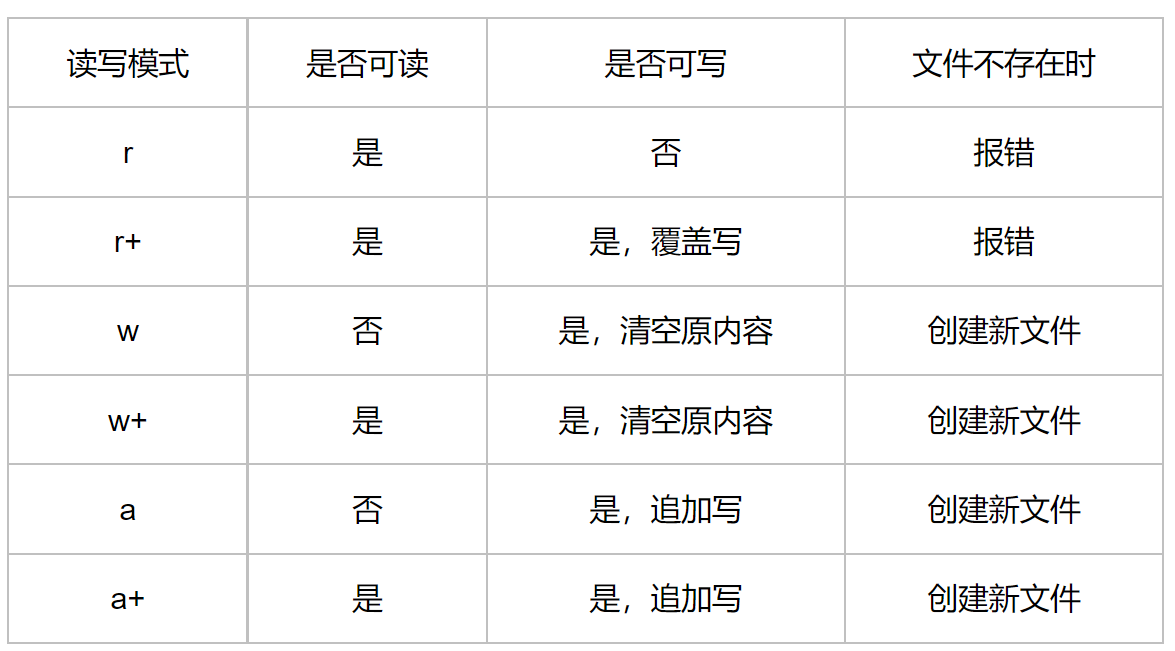

#### 系统sys模块
+ 获取引用计数  sys.getrefcount(a)
+ 获取python版本  sys.version    也可使用python -V
+ 获取对象的内存字节占用量  sys.getsizeof()

In [73]:
import sys
a = [1,2,3]
sys.getrefcount(a)

2

In [29]:
b=a
sys.getrefcount(a)

3

In [76]:
sys.version

'3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]'

In [80]:
sys.version_info

sys.version_info(major=3, minor=8, micro=8, releaselevel='final', serial=0)

In [83]:
sys.getsizeof(range(100000000))

48

### CookBook

#### 以迭代器形式赋值给N个变量

In [1]:
data = [ 'ACME', 50, 91.1, (2012, 12, 21) ]
name, shares, price, date = data

In [2]:
name, shares

('ACME', 50)

#### 占位符变量_

#### *号符： 
+ 将列表分为多个单变量参数
+ 在赋值时为一个可变列表，也可以操作字符串
+ 使用zip(*[...])将二维列表转置，但是个数只有子列表长度

In [8]:
a=[1,2,3]
b = [2,3,4]
[*a,*b]

[1, 2, 3, 2, 3, 4]

In [9]:
record = ('Dave', 'dave@example.com', '773-555-1212', '847-555-1212')
name, email, *phone_numbers = record
phone_numbers

['773-555-1212', '847-555-1212']

In [10]:
records = [
    ('foo', 1, 2),
    ('bar', 'hello'),
    ('foo', 3, 4),
]

def do_foo(x, y):
    print('foo', x, y)

def do_bar(s):
    print('bar', s)

for tag, *args in records:
    if tag == 'foo':
        do_foo(*args)
    elif tag == 'bar':
        do_bar(*args)

foo 1 2
bar hello
foo 3 4


In [11]:
line = 'nobody:*:-2:-2:Unprivileged User:/var/empty:/usr/bin/false'
uname, *fields, homedir, sh = line.split(':')
uname,homedir

('nobody', '/var/empty')

In [1]:
list(zip(*['ab','cd','abc','da']))

[('a', 'c', 'a', 'd'), ('b', 'd', 'b', 'a')]

In [2]:
list(zip("ab", "a",'abc','da'))

[('a', 'a', 'a', 'd')]

#### 数字
1. round:舍入，可以指定舍入到的位数
> 当一个值刚好在两个边界的中间的时候， round 函数返回离它最近的偶数。 也就是说，对1.5或者2.5的舍入运算都会得到2。
2. 无穷大和inf：使用float创建  float('inf') float('-inf')  float('nan')

##### 使用decimal进行精确的浮点数运算

In [12]:
from decimal import Decimal
a = Decimal('1.1')
b = Decimal('2.1')
a+b

Decimal('3.2')

控制数字位数和精度

In [13]:
from decimal import localcontext
with localcontext() as ctx:
    ctx.prec = 10
    print(b/a)

1.909090909


使用math.fsum()解决丢失的“1”

In [14]:
nums = [1.23e+18, 1, -1.23e+18]
sum(nums)

0.0

In [15]:
import math
math.fsum(nums)

1.0

##### 随机数
1. random.choice()：从一个序列中随机的抽取一个元素
2. random.sample()：从一个序列中随机的抽取N个元素
3. random.shuffle():打乱顺序，会改变原数组
4. random.randint()：生成随机整数
5. random.random()：生成0到1范围内均匀分布的浮点数

In [28]:
import random
values = [1, 2, 3, 4, 5, 6]
random.choice(values),random.choices(values,k=2),random.sample(values,2)

(2, [1, 1], [4, 6])

In [30]:
random.shuffle(values)
values

[5, 2, 4, 1, 3, 6]

#### 列表操作

##### 初始化
+ 重复N次：[1]*10
+ 若是可变对象，则*重复只会复制指针
+ 使用列表表达式重复可以避免上述问题

In [11]:
[1]*10

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [22]:
m = [ [1,2,3,4,5]] *3
m

[[1, 2, 3, 4, 5], [1, 2, 3, 4, 5], [1, 2, 3, 4, 5]]

In [24]:
m[0][1] = 10
m[2][4] = 20
m

[[1, 10, 3, 4, 20], [1, 10, 3, 4, 20], [1, 10, 3, 4, 20]]

In [25]:
m = [[1,2,3,4,5] for _ in range(3)]
m[0][1] = 10
m[2][4] = 20
m

[[1, 10, 3, 4, 5], [1, 2, 3, 4, 5], [1, 2, 3, 4, 20]]

##### 间隔切片
+ ::num表示以num为间隔切片
+ start:end:step表示从头到尾以step切片
+ start可以省略，但是:不能省略

In [5]:
a = [1, 2, 3, 4, 5]
a[::2]

[1, 3, 5]

In [2]:
a = [1, 2, 3, 4, 5]
a[1:4:2]

[2, 4]

In [3]:
a[::-1]

[5, 4, 3, 2, 1]

In [4]:
a[3::-1]

[4, 3, 2, 1]

In [9]:
a[:3:2]

[1, 3]

##### 扩展列表 ls.extend(ls2)

In [10]:
a = [1,2,3]
b = [4,5]
a.extend(b)
a

[1, 2, 3, 4, 5]

##### 列表分组拆分zip()
+ 拆分的长度为最短的列表长度
+ 若需要以最长的列表长度对齐，则使用from itertools import zip_longest

In [37]:
a,b,c = [1,2,3],[4,5,6,],[1]
list(zip(a,b,c))

[(1, 4, 1)]

In [39]:
from itertools import zip_longest
list(zip_longest(a,b,c ))

[(1, 4, 1), (2, 5, None), (3, 6, None)]

##### 数组按间隔n分组

In [58]:
def chunk(lst, n):
    for i in range(0, len(lst), n):
        yield lst[i:i+n]

a = [1, 2, 3, 4, 5, 6, 7, 8]
list(chunk(a, 3))

[[1, 2, 3], [4, 5, 6], [7, 8]]

#### 字符串操作

##### join连接列表里的字符，前面的字符串作为间隔

In [8]:
''.join(i for i in ['2','3','4'])

'234'

In [17]:
','.join(i for i in ['2','3','4'])

'2,3,4'

##### str.startswith() 和 str.endswith() 

In [9]:
filename = 'spam.txt'
filename.endswith('.txt')

True

查询多个

In [13]:
filename.endswith(('.txt','.txt1'))

True

##### re正则

+ 使用同一个模式去做多次匹配，将模式字符串预编译为模式对象
+ match只会匹配字符串的开头部分，后面不检查，使用group获取值
+ search匹配字符串的所有部分
+ findall返回所有的匹配，若有捕获分组，则只返回捕获，且捕获以分组返回
+ finditer使用迭代器返回所有的匹配，且包含捕获内容
+ re.sub(r'(\d+)/(\d+)/(\d+)', r'\3-\1-\2', text)替换内容

In [24]:
import re
text1 = '11/27/2012'
datepat = re.compile(r'\d+/\d+/\d+')
datepat.match(text1).group()

'11/27/2012'

用括号去捕获分组，使用group获取

In [22]:
datepat = re.compile(r'(\d+)/(\d+)/(\d+)')
m = datepat.match('11/27/2012')
m.group(0),m.group(1),m.group(2)

('11/27/2012', '11', '27')

In [42]:
import re
text1 = 'dsasda11/27/2012dasda hkl  12/22/202112'
datepat = re.compile(r'(\d+)/(\d+)/(\d+)')
datepat.search(text1).group(0)

'11/27/2012'

In [45]:
list(datepat.finditer(text1))[1].group(0)

'12/22/202112'

In [46]:
datepat.findall(text1)

[('11', '27', '2012'), ('12', '22', '202112')]

In [49]:
datepat = re.compile(r'[a-z]+(\d+)/(\d+)/(\d+)')
datepat.findall(text1)

[('11', '27', '2012')]

使用命名分组

In [50]:
text = 'Today is 11/27/2012. PyCon starts 3/13/2013.'
import re
re.sub(r'(?P<month>\d+)/(?P<day>\d+)/(?P<year>\d+)', r'\g<year>-\g<month>-\g<day>', text)

'Today is 2012-11-27. PyCon starts 2013-3-13.'

##### 将Unicode文本标准化
在Unicode中，某些字符能够用多个合法的编码表示。

In [1]:
s1 = 'Spicy Jalape\u00f1o'
s2 = 'Spicy Jalapen\u0303o'

In [2]:
import unicodedata
t1 = unicodedata.normalize('NFC', s1)
t2 = unicodedata.normalize('NFC', s2)
t1 == t2

print(ascii(t1))

'Spicy Jalape\xf1o'


In [4]:
t3 = unicodedata.normalize('NFD', s1)
t4 = unicodedata.normalize('NFD', s2)
t3 == t4

True

##### strip: 去掉文本字符串开头，结尾或者中间不想要的字符
+ 默认去掉空白字符
+ lstrip去掉左边的，rstrip去掉右边的
+ 也可以自行指定要去掉的字符串

In [5]:
s = '   hello world \n'
s.strip(), s.lstrip()

('hello world', 'hello world \n')

In [6]:
t = '-----hello====='
t.lstrip('-')

'hello====='

#### 字典操作
##### 创建字典
1. dict.fromkeys，默认值为none
2. dict(二维列表)
3. 通过字典推导式创建

In [10]:
x = ('key1', 'key2', 'key3')
#y = 0

thisdict = dict.fromkeys(x)
thisdict

{'key1': None, 'key2': None, 'key3': None}

In [13]:
dict([['1',2],['3',4]])

{'1': 2, '3': 4}

In [14]:
{i:2*i for i in range(3)}

{0: 0, 1: 2, 2: 4}

In [16]:
dict(zip('abc', [1, 2, 3]))

{'a': 1, 'b': 2, 'c': 3}

##### 字典方法
+ keys   获取所有值
+ values  获取所有键
+ items  获取键值对对象
+ get(key,alt)  若不指定alt且无这个键，则返回None,否则返回alt
+ 使用['key']获取值时，若无键则报错
+ del dict['key']  删除键值对

In [4]:
a = dict([['1',2],['3',4]])
type(a.get('2'))

NoneType

##### 字典排序

In [44]:
prices = {
    'ACME': 45.23,
    'AAPL': 612.78,
    'IBM': 205.55,
    'HPQ': 37.20,
    'FB': 10.75
}
min_price = min(zip(prices.values(), prices.keys()))
min_price

(10.75, 'FB')

In [45]:
sorted(zip(prices.values(), prices.keys()))

[(10.75, 'FB'),
 (37.2, 'HPQ'),
 (45.23, 'ACME'),
 (205.55, 'IBM'),
 (612.78, 'AAPL')]

In [48]:
sorted(prices,key=lambda x:x[1])

['AAPL', 'IBM', 'FB', 'ACME', 'HPQ']

#### 集合

#### 基本

In [4]:
a = {1,2,3}
b = set([1,2,3])
a,b

({1, 2, 3}, {1, 2, 3})

In [6]:
a.add(4)
a

{1, 2, 3, 4}

In [9]:
set(a)

{'1', '2', '3'}

##### 集合运算
集（set）是由零个或多个不可修改的Python 数据对象组成的无序集合。集不允许重复元素，
并且写成由花括号包含、以逗号分隔的一系列值。空集由set()来表示。
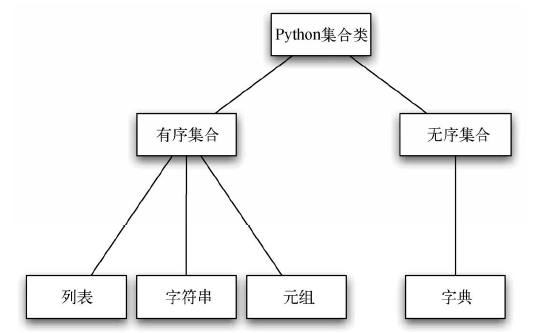

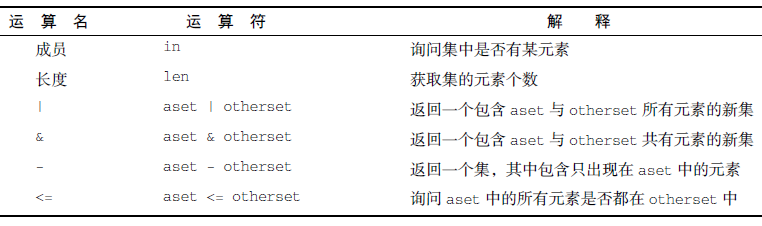

In [9]:
{1,2,3}&{2,3,4}

{2, 3}

In [11]:
a = {"1":1, "2":2, "3":3}
b = {"2":2, "3":3, "4":4}

c = set(a)&set(b)
c

{'2', '3'}

#### 浅拷贝（非递归）和深拷贝（递归）
+ 浅拷贝只会拷贝到第一层的数据，对于数组，若使用a = list(ls)来赋值，则只有一维数组有效，二维数组则只会有引用
+ 深拷贝会循环遍历到所有的数据，因此不存在共享指针的问题
+ 使用copy模块的deepcopy来深拷贝

In [34]:
a = [1,[1,2]]
b = list(a)
b[1][0] = 12
a,b

([1, [12, 2]], [1, [12, 2]])

In [35]:
import copy
a = [1,[1,2]]
b = copy.deepcopy(a)
b[1][0] = 12
a,b

([1, [1, 2]], [1, [12, 2]])

##### 使用\*对字典和列表浅拷贝

In [15]:
a = {"x": 55, "y": 66,"z":[1,2,3]}
b = {"a": "foo", "b": "bar"}
c = {**a, **b}

In [17]:
a['x'] =10
c['x'] =20
a['z'][0] = 123
c['z'][0] = 123
a,c

({'x': 10, 'y': 66, 'z': [123, 2, 3]},
 {'x': 20, 'y': 66, 'z': [123, 2, 3], 'a': 'foo', 'b': 'bar'})

#### itertools和collections模块的常用方法

##### itertools.groupby(s)分组

In [60]:
import itertools
s = "AAABBCCCCC"
for k, v in itertools.groupby(s):
    print(k, list(v))

A ['A', 'A', 'A']
B ['B', 'B']
C ['C', 'C', 'C', 'C', 'C']


In [64]:
import itertools
s = [[1,2,3],[3,4,3],[0,0,0],[6,3,2]]
# 以是否大于10分组
for k, v in itertools.groupby(s,key=lambda nums:sum(nums)>10):
    print(k, list(v))

False [[1, 2, 3], [3, 4, 3], [0, 0, 0]]
True [[6, 3, 2]]


##### 分类计数collections.Counter

In [67]:
import collections
s = "AAABBCCCCC"
# 以是否大于10分组
collections.Counter(s)

Counter({'A': 3, 'B': 2, 'C': 5})

### 数据结构

#### collections.deque : 双端队列
deque是双端队列（double-ended queue）的缩写，由于两端都能编辑，deque既可以用来实现栈（stack）也可以用来实现队列（queue）。相比于list实现的队列，deque实现拥有更低的时间和空间复杂度。list实现在出队（pop）和插入（insert）时的空间复杂度大约为O(n)，deque在出队（pop）和入队（append）时的时间复杂度是O(1)。
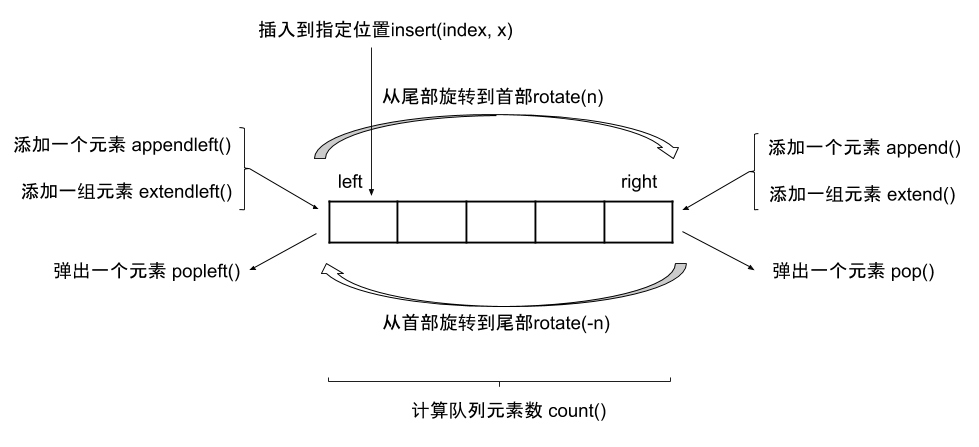

+ 迭代操作或者其他操作的时候，可用于保留最后有限几个元素

In [16]:
from collections import deque
q = deque(maxlen=3)  #指定最大长度
q.append(1)
q.append(3)
q.append(4)
q.append(2)
q

deque([3, 4, 2])

使用deque来存储序列最后几个元素而不占用额外空间

In [57]:
from collections import deque
def tail(path, n=4):
    f = path
    return deque(f, n)

tail("/etc/hosts")

deque(['o', 's', 't', 's'])

#### heapq: 查找最大或最小的 N 个元素

当要查找的元素个数相对比较小的时候，函数 nlargest() 和 nsmallest() 是很合适的。 如果你仅仅想查找唯一的最小或最大（N=1）的元素的话，那么使用 min() 和 max() 函数会更快些。 类似的，如果 N 的大小和集合大小接近的时候，通常先排序这个集合然后再使用切片操作会更快点 （ sorted(items)[:N] 或者是 sorted(items)[-N:] ）。 需要在正确场合使用函数 nlargest() 和 nsmallest() 才能发挥它们的优势 （如果 N 快接近集合大小了，那么使用排序操作会更好些）。

In [18]:
import heapq
portfolio = [
    {'name': 'IBM', 'shares': 100, 'price': 91.1},
    {'name': 'AAPL', 'shares': 50, 'price': 543.22},
    {'name': 'FB', 'shares': 200, 'price': 21.09},
    {'name': 'HPQ', 'shares': 35, 'price': 31.75},
    {'name': 'YHOO', 'shares': 45, 'price': 16.35},
    {'name': 'ACME', 'shares': 75, 'price': 115.65}
]
cheap = heapq.nsmallest(3, portfolio, key=lambda s: s['price'])
expensive = heapq.nlargest(3, portfolio, key=lambda s: s['price'])

##### 使用堆排序原理：
堆数据结构最重要的特征是 heap[0] 永远是最小的元素

In [20]:
nums = [1, 8, 2, 23, 7, -4, 18, 23, 42, 37, 2]
heapq.heapify(nums)
nums

[-4, 2, 1, 23, 7, 2, 18, 23, 42, 37, 8]

In [30]:
heapq.heappop(nums)

18

In [21]:
heapq.heappop(nums)
nums

[1, 2, 2, 23, 7, 8, 18, 23, 42, 37]

##### 实现优先级队列

index 变量的作用是保证同等优先级元素的正确排序。 通过保存一个不断增加的 index 下标变量，可以确保元素按照它们插入的顺序排序。 而且， index 变量也在相同优先级元素比较的时候不会报错。

In [ ]:
import heapq

class PriorityQueue:
    def __init__(self):
        self._queue = []
        self._index = 0

    def push(self, item, priority):
        heapq.heappush(self._queue, (-priority, self._index, item))
        self._index += 1

    def pop(self):
        return heapq.heappop(self._queue)[-1]

In [ ]:
>>> class Item:
...     def __init__(self, name):
...         self.name = name
...     def __repr__(self):
...         return 'Item({!r})'.format(self.name)
...
>>> q = PriorityQueue()
>>> q.push(Item('foo'), 1)
>>> q.push(Item('bar'), 5)
>>> q.push(Item('spam'), 4)
>>> q.push(Item('grok'), 1)
>>> q.pop()
Item('bar')
>>> q.pop()
Item('spam')
>>> q.pop()
Item('foo')
>>> q.pop()
Item('grok')
>>>